In [1]:
# - The Task -
# To find the ground truth of people who were aboard the titanic but did not get classed as dead or alive
# Make a prediction for who lived or perished using the test data
# There must be an output file showing the ['PassengerID', 'Survived']
# 0 for dead, 1 for alive

In [2]:
# - Framing the problem -
# Supervised, Classification task (Prediction is dead or alive)
# Batch Learning (We have all data, it can fit in memory)
# Instance Based Learning (Using the attributes to classify a person based on their similarities with people who lived or died in the training set)

In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np

In [4]:
test_data_path = 'datasets/titanic_test.csv'
train_data_path = 'datasets/titanic_train.csv'

def load_data(path):
    return pd.read_csv(path)

In [5]:
titanic_data_test = load_data(test_data_path)
titanic_data = load_data(train_data_path)

In [6]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Possibly do median age for women and men individually
titanic_data['Age'].median()

28.0

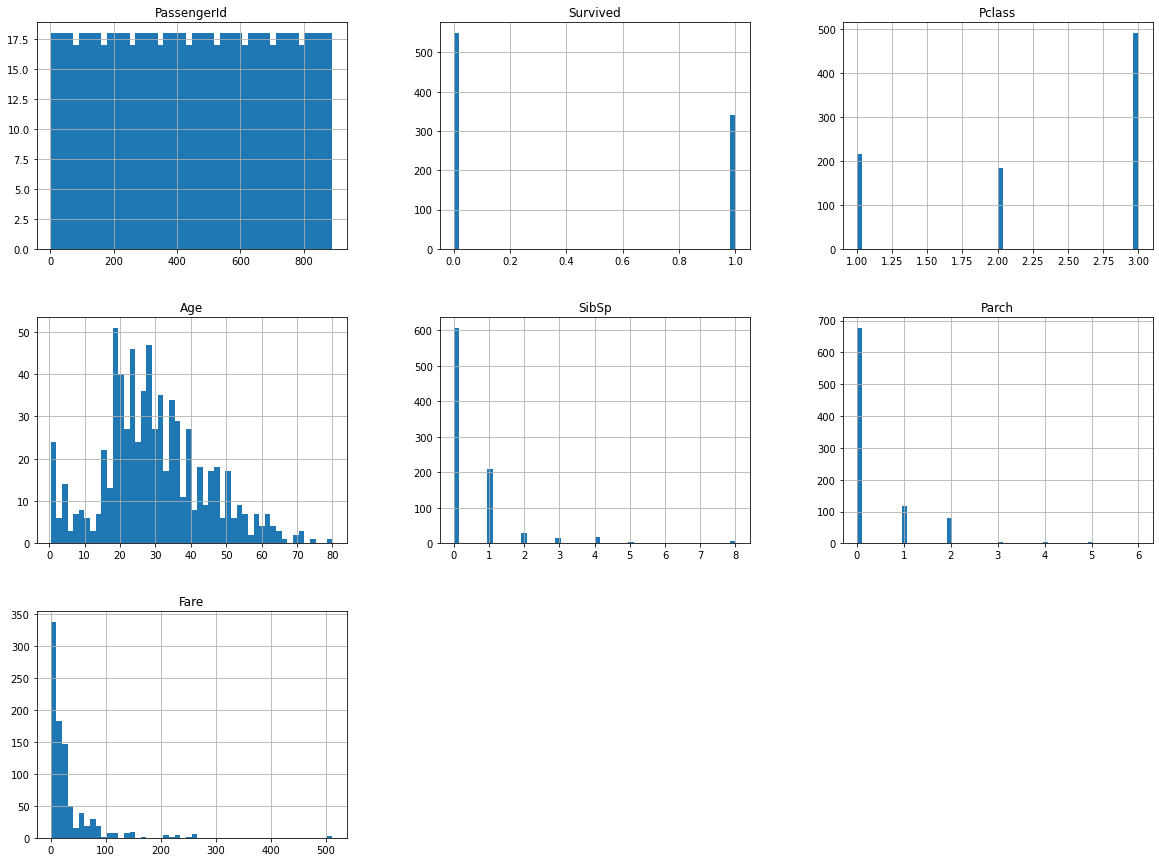

In [10]:
%matplotlib inline

titanic_data.hist(bins=50, figsize=(20, 15))
plt.show()

In [11]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
corr_matrix = titanic_data.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Fare'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Fare'>,
        <AxesSubplot:xlabel='Age', ylabel='Fare'>,
        <AxesSubplot:xlabel='Fare', ylabel='Fare'>]], dtype=object)

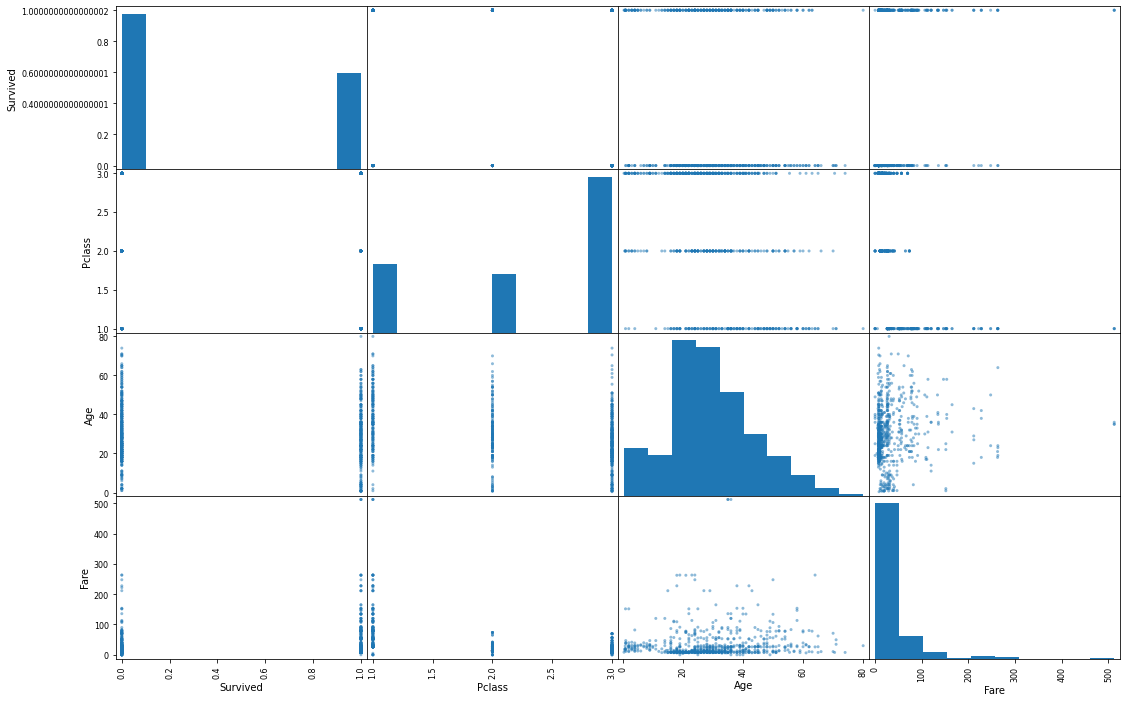

In [13]:
attributes = ['Survived', 'Pclass', 'Age', 'Sex', 'Fare']
scatter_matrix(titanic_data[attributes], figsize=(18, 12))

In [14]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
# Transforming the data
# Removing the labels for training
titanic_labels = titanic_data['Survived'].copy()
titanic_data = titanic_data.drop('Survived', axis=1)

# Changing PassengerId to index so it does not get calculated
titanic_ids = titanic_data['PassengerId'].copy()
titanic_data = titanic_data.set_index('PassengerId')

In [16]:
# Copying cols incase they get dropped to possibly use later
titanic_names = titanic_data['Name'].copy()
titanic_tickets = titanic_data['Ticket'].copy()
titanic_cabin = titanic_data['Cabin'].copy()

In [17]:
# Dropping names, ticket since they should not make a difference
# Dropping cabin because there is too many missing values

def drop_unwanted_cols(data, name=True, ticket=True, cabin=True):
    if name == True:
        data = data.drop('Name', axis=1)
    if ticket == True:
        data = data.drop('Ticket', axis=1)
    if cabin == True:
        data = data.drop('Cabin', axis=1)
    
    return data

In [18]:
titanic_data_new = drop_unwanted_cols(titanic_data.copy())

In [19]:
# Fill missing age values with the median
median_age = titanic_data['Age'].median()
titanic_data_new['Age'].fillna(median_age, inplace=True)

In [20]:
# Use one hot encoder for categorical attributes for sex
titanic_sex_cats = titanic_data_new[['Sex']]
titanic_data_new = titanic_data_new.drop('Sex', axis=1)

onehot_encoder_sex = OneHotEncoder()
titanic_sex_1hot = onehot_encoder_sex.fit_transform(titanic_sex_cats)

In [21]:
# Use one hot encoder for categorical attributes for embarked
titanic_embarked_cats = titanic_data_new[['Embarked']]
titanic_data_new = titanic_data_new.drop('Embarked', axis=1)

onehot_encoder_embarked = OneHotEncoder()
titanic_embarked_1hot = onehot_encoder_embarked.fit_transform(titanic_embarked_cats)

In [22]:
titanic_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Impute missing values to the median of that column
# Transform values using Standard Scaling

transformation_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                                    ('std_scaler', StandardScaler())])

titanic_nums_transformed = transformation_pipeline.fit_transform(titanic_data_new)

In [24]:
from sklearn.compose import ColumnTransformer

num_attribs = list(titanic_data_new)
sexcat_attribs = ["Sex"]
embarkedcat_attribs = ["Embarked"]


full_pipeline = ColumnTransformer([("num", transformation_pipeline, num_attribs), 
                                   ("sex_cat", OneHotEncoder(), sexcat_attribs)])

# ("embarked_cat", OneHotEncoder(), embarkedcat_attribs)
titanic_data_prepared = full_pipeline.fit_transform(titanic_data)

In [25]:
# Logistic regression algorithm
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(titanic_data_prepared, titanic_labels)

titanic_survival_rate = log_reg.predict(titanic_data_prepared)

In [26]:
from sklearn.model_selection import cross_val_score

log_reg_scores = cross_val_score(log_reg, titanic_data_prepared, titanic_labels, cv=10)
log_reg_scores

array([0.78888889, 0.78651685, 0.74157303, 0.82022472, 0.80898876,
       0.76404494, 0.7752809 , 0.7752809 , 0.79775281, 0.82022472])

In [27]:
# Logistic regression algorithm
from sklearn.ensemble import RandomForestClassifier

rf_class = RandomForestClassifier()

rf_class.fit(titanic_data_prepared, titanic_labels)

rf_class_titanic_survival_rate = rf_class.predict(titanic_data_prepared)

In [28]:
rf_class_scores = cross_val_score(rf_class, titanic_data_prepared, titanic_labels, cv=10)
rf_class_scores

array([0.72222222, 0.78651685, 0.74157303, 0.87640449, 0.85393258,
       0.83146067, 0.80898876, 0.75280899, 0.84269663, 0.84269663])

In [29]:
# Logistic regression algorithm
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestClassifier()

rf_reg.fit(titanic_data_prepared, titanic_labels)

rf_reg_titanic_survival_rate = rf_reg.predict(titanic_data_prepared)

In [30]:
rf_reg_scores = cross_val_score(rf_reg, titanic_data_prepared, titanic_labels, cv=10)
rf_reg_scores

array([0.74444444, 0.7752809 , 0.74157303, 0.87640449, 0.86516854,
       0.83146067, 0.82022472, 0.7752809 , 0.83146067, 0.85393258])

In [31]:
# Now to use the test set
final_model = rf_reg

titanic_ids = titanic_data_test['PassengerId'].copy()
titanic_data_test = titanic_data_test.set_index('PassengerId')

titanic_test_prepared = full_pipeline.fit_transform(titanic_data_test)

In [32]:
titanic_data_prepared[:5]

array([[ 0.82737724, -0.56573646,  0.43279337, -0.47367361, -0.50244517,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, -0.47367361,  0.78684529,
         1.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , -0.47367361, -0.48885426,
         1.        ,  0.        ],
       [-1.56610693,  0.4333115 ,  0.43279337, -0.47367361,  0.42073024,
         1.        ,  0.        ],
       [ 0.82737724,  0.4333115 , -0.4745452 , -0.47367361, -0.48633742,
         0.        ,  1.        ]])

In [33]:
final_predictions = final_model.predict(titanic_test_prepared)

In [34]:
data = {'PassengerId': titanic_ids, 'Survived': final_predictions}

final_results = pd.DataFrame(data=data)

In [35]:
final_results

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [36]:
final_results.to_csv(r'C:/Users/Josh/Desktop/results_rf_reg_file.csv', index=False)